# 6장. 차원 축소
    차원 축소 : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.
    매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.

1. 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
2. 피처 추출 : 기존 피처를 저차원의 중요 피처로 압축해서 추출. But, 압축된 피처는 기존 피처와 완전히 다른 값이 됨.

이미지 데이터 : 피처추출은 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것이다.
차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 것이 중요.
매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다. 이렇게 변환된 이미지는 우너본 이미지보다 훨씬 적은 차원이끼 때문에 이미지 분류 등의 분류 수행 시에 과적합 영향력이 작아져서 오히려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어올릴 수 있다.

# PCA
    : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소
    PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다. (즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)

1. 데이터 변동성이 가장 큰 방향으로 축 생성
2. 새로운 축으로 데이터 투영
3. 새로운 축 기준으로 데이터 표현

PCA는
1. 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성
2. 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함.
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성.

즉, PCA(주성분분석)는 원본 데이터 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법.
선형대수 관점에서 해석하면, 입력 데이터의 공분산 행렬을 고유값 분해하고, 이 고유벡터에 입력 데이터를 선형 변환하는 것.
+ 고유값 : 고유벡터의 그기, 입력 데이터의 분산을 나타냄
+ 선형 변환 : 특정 벡터에 행렬을 곱해 새로운 벡터로 변환
+ 공분산 : 한 개의 변수의 데이터 변동이 아니라, 두 변수 간의 변동을 의미
+ 공분산 행렬 : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
+ 고유벡터 : 행렬을 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭. 

공분산 C = 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치행렬
+ e1 : 가장 분산이 큰 방향을 가진 고유벡터
+ e2 : e1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터
=> PCA : 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식

PCA 스텝
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [1]:

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼있는지 2차원으로 시각화하기. 
    2차원이므로 두개의 속성인 sepal_length와 sepal width를 X,Y축으로 해 품종 데이터 분포를 나타내보자.

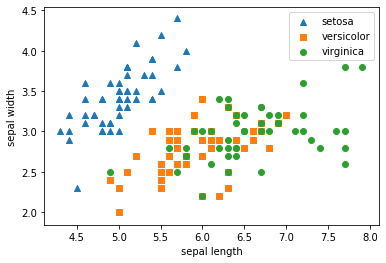

In [2]:

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length'] # 타겟의 인덱스와 같은 행의 sepal_length값 저장
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### => Setosa의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포되있음. Versicolor와 virginica의 경우 두 축만으로는 분류가 어려운 복자한 조건임.
    이제 PCA로 4개의 속성을 2개로 압축한 뒤 시각화해보자.
    먼저 PCA 적용 전에 개별 속성을 함께 스케일링해야함. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받기 때문에, 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는것이 필요.

In [4]:

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

#### 이제 PCA로 차원을 축소하자. n_components는 축소할 차원의 수로, 여기선 2차원으로 축소하므로 2를 대입.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

#### iris_pca는 2차원으로 변환된 PCA 데이터세트를 150X2 넘파이 행렬로 가짐. 이를 DF로 변환한 뒤 데이터값 확인해보자.

In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


#### 이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원으로 시각화해보자.

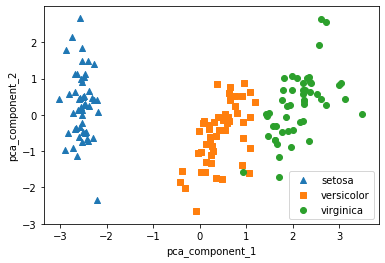

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

#### PCA 변환된 데이터 세트가 원본보다 더 명확하게 분리되있다. 이는 PCA의 첫번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 매우 잘 반양하기 때문. 
    PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공함.

In [7]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


#### 첫 번째 PCA 변환요소인 pca_component_1이 전체 변동성의 약 76.5%를 차지하며, 두 번째인 pca_component_2가 18.4% 차지함. 즉, PCA를 2개의 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음.

#### 이번에는 원본과 PCA로 변환된 데이터 세트에 각각 랜덤포레스트를 적용해보자.

In [8]:
# 원본데이터 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)

[0.98039216 0.92156863 0.97916667]


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
# PCA화한 데이터 랜덤포레스트
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.96078431 1.         1.        ]


/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/air/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### => 대부분 PCA 변환 차원 개수에 따라 예측 성능이 떨어질수밖에 없음. 위의 경우는 4개의 속성이 2개의 변환 속성이 돼도 예측 성능에 전혀 영향을 받지 않을 정도로 PCA 변환이 잘 적용되었음을 의미. 고차원의 데이터를 저차원 데이터로 변환하면 직관적으로 이해하기도 편하며, 데이터의 주축을 이루는 속성이 어떤 것인지 쉽게 파악 가능.

### 이번엔 신용카드 데이터로 PCA 해서 돌려보자.

In [25]:
import pandas as pd

df = pd.read_excel('/Users/air/Leena Python/MachineLearning/Data/default of credit card clients(2).xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30000, 25)


,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### 'default payment next month' 속성이 Target값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0. 
    원본데이터에 PAY_0 다음이 PAY_2이므로 PAY_0을 1로 바꾸고 default payment next month도 너무 길으니 default로 칼럼명 변겅하자. 이후 Target 속성인 default 칼럼을 y_target 변수로 별도로 저장하고 피처 데이터는 이 default 칼럼을 제외한 별도의 DF로 만들자.

In [26]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)


In [27]:
y_target = df['default']
X_features = df.drop('default', axis=1)

In [19]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
Unnamed: 0    30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAY_1         30000 non-null int64
PAY_2         30000 non-null int64
PAY_3         30000 non-null int64
PAY_4         30000 non-null int64
PAY_5         30000 non-null int64
PAY_6         30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


#### 이 데이터 세트는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높다. DF의 corr()를 이용해 각 속성 간의 상관도를 구한 뒤 이를 시본의 heatmap으로 시각화하자.

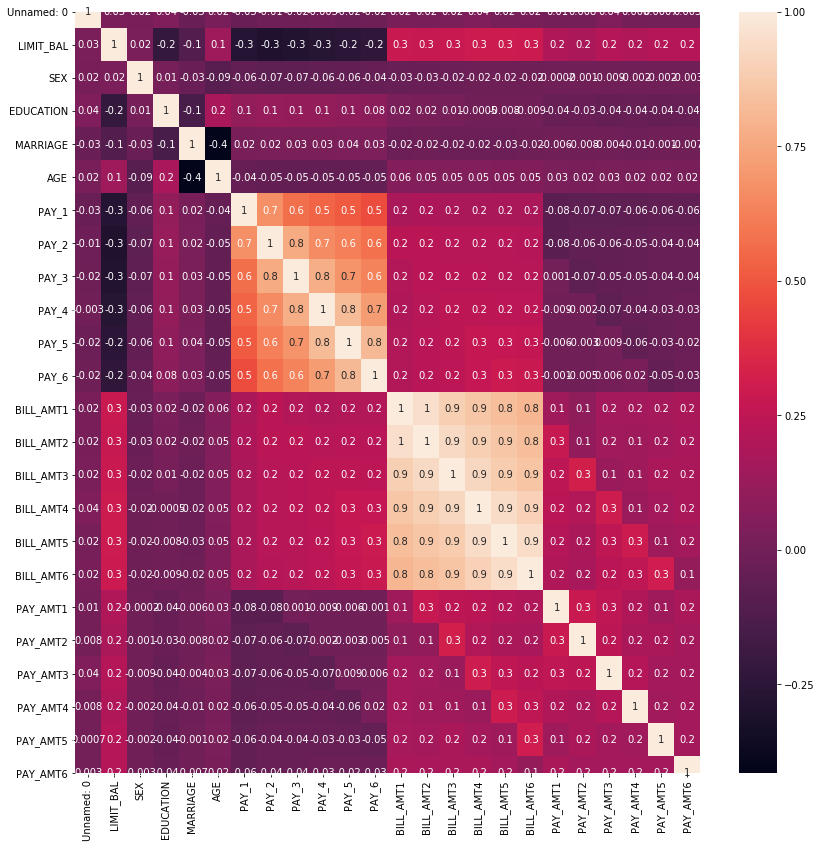

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

#### => BILL_AMT1 ~ BILL_AMT6간의 상관관계와, PAY_1 ~ PAY_6까지의 속성이 상관도가 높다. 먼저 BILL_AMT1 ~ 6까지 2가지 차원으로 PCA로 축소해보자.

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


#### => 6개의 속성을 2개로 차원축소를 한 결과 변동상을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다.

#### 이번엔 원본과 PCA 변환 데이터의 분류 예측 결과를 비교해보자. 

In [30]:
# 원본 데이터 랜덤포레스트
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.257  0.8209 0.784 ]
평균 정확도:0.6206


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7782 0.7991 0.8035]
PCA 변환 데이터 셋 평균 정확도:0.7936


#### => 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 우너본 데이터 기반 분류 예측결과보다 약 1~2%정도의 예측 성능 상승.

#### => PCA는 사실 데이터보단 이미지 차원 축소에서 많이 쓴다.

# LDA (Linear Discriminant Analysis)
    : 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.
    PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
    LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소한다. 즉, 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 가져간다.
    LDA는 PCA처럼 공분산 행렬이 아니라 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다.

#### LDA 스텝
1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.
2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 SB라고 하면 p.390 식으로 두 행렬을 고유벡터로 분해할 수 있음.
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

## 붓꽃 데이터 세트에 LDA 적용하기

In [32]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data) # 표준정규분포로 스케일링

In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


#### 주의 : PCA와 다르게 비지도 학습이 아닌 지도학습이기 때문에 클래스의 결정값이 변환시에 필요함 (iris_target)

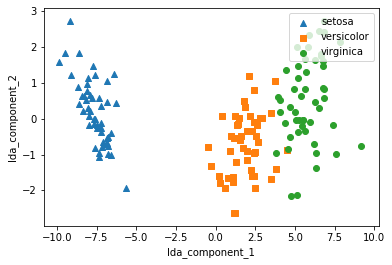

In [34]:
# 이제 LDA 변환된 입력 데이터값을 2차원 평면에 품종별로 표현해보자.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()